In [74]:
import pandas as pd
import numpy as np
import cv2

from urllib.parse import urlparse
from os.path import splitext

#3
from matplotlib.pyplot import imshow

In [9]:
def get_ext(url):
    """Return the filename extension from url, or ''."""
    parsed = urlparse(url)
    root, ext = splitext(parsed.path)

    return ext

# 1

In [19]:
## TODO: Load the faces_subset.txt with the relevant columns and name the columns
faces_df = pd.read_table("./faces_subset.txt", 
                         usecols=[0,3,4],
                         names= ["actor", "link", "crop"]
                        )
#
filext = faces_df.apply(lambda x: get_ext(x["link"]), axis=1)

## TODO: Create in a new column a file name each of the row that is going to be used to store the images locally
faces_df = faces_df.assign(file=range (1,len(faces_df)+1))
faces_df["file"]= faces_df["actor"].map(str)+faces_df["file"].map(str)+filext.map(str)
#'.jpg' 
#faces_df["links"]#.map(str,[-4:])

faces_df

,actor,link,crop,file
0,Aaron Eckhart,http://upload.wikimedia.org/wikipedia/commons/...,"53,177,418,542",Aaron Eckhart1.jpg
1,Aaron Eckhart,http://movies.dosthana.com/sites/default/files...,"80,102,260,282",Aaron Eckhart2.jpg
2,Aaron Eckhart,http://upload.wikimedia.org/wikipedia/commons/...,"203,802,975,1574",Aaron Eckhart3.jpg
3,Aaron Eckhart,http://25.media.tumblr.com/nJ2vga5sae9o2ks4Flt...,"62,90,231,259",Aaron Eckhart4.jpg
4,Aaron Eckhart,http://upload.wikimedia.org/wikipedia/commons/...,"276,120,492,336",Aaron Eckhart5.jpg
5,Aaron Eckhart,http://media.zenfs.com/en_us/Movies/PhotoG/2nd...,"235,158,540,463",Aaron Eckhart6.jpg
6,Aaron Eckhart,http://img2.timeinc.net/people/i/2008/news/080...,"60,57,178,175",Aaron Eckhart7.jpg
7,Aaron Eckhart,http://latimesblogs.latimes.com/photos/uncateg...,"30,149,326,445",Aaron Eckhart8.jpg
8,Aaron Eckhart,http://collider.com/wp-content/uploads/Aaron-E...,"697,733,1878,1914",Aaron Eckhart9.jpg
9,Aaron Eckhart,http://movies.dosthana.com/sites/default/files...,"375,157,571,353",Aaron Eckhart10.jpg


In [16]:
import urllib.request
import threading

def timeout(args=(), kwargs={}, timeout_duration=30, default=None):
    '''From:
    http://code.activestate.com/recipes/473878-timeout-function-using-threading/'''
    
    class InterruptableThread(threading.Thread):
        def __init__(self):
            threading.Thread.__init__(self)
            self.result = None

        def run(self):
            try:
                urllib.request.urlretrieve(*args)
            except:
                self.result = default

    it = InterruptableThread()
    it.start()
    it.join(timeout_duration)
      
    if it.isAlive():
        return False
    else:
        return it.result
    
## TODO: iterate through the rows and apply the timeout function to download the images into the "uncropped" folder
faces_df.apply(lambda x: timeout((x["link"], "./uncropped/" + x["file"])), axis=1)

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10      False
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
        ...  
2135    False
2136     None
2137     None
2138     None
2139     None
2140     None
2141     None
2142     None
2143     None
2144     None
2145     None
2146     None
2147     None
2148    False
2149     None
2150     None
2151     None
2152     None
2153     None
2154     None
2155     None
2156     None
2157     None
2158     None
2159     None
2160     None
2161     None
2162     None
2163     None
2164     None
Length: 2165, dtype: object

In [32]:
## TODO: write the crop function
## I use a try-except method to return None if the image does not exist in the "uncropped" folder
def crop(filename, param):
    try:
        ## TODO: load the image
        image = cv2.imread('./uncropped/'+filename,flags=0)
        ## TODO: the list of integers and crop the image
        x1, y1, x2, y2 = param.split(',',3)
        crop_img = image[int(y1):int(y2), int(x1):int(x2)]
        ## TODO: resize the image to (64, 64)
        scale_img = cv2.resize(crop_img,(64, 64))
        ## TODO: save the image to the "cropped" folder
        cv2.imwrite('./cropped/'+filename, scale_img)
    except:
        pass
        
    
## TODO: apply the function crop to each row in faces_subset.txt   
faces_df.apply(lambda x: crop(x['file'], x['crop']), axis=1)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
2135    None
2136    None
2137    None
2138    None
2139    None
2140    None
2141    None
2142    None
2143    None
2144    None
2145    None
2146    None
2147    None
2148    None
2149    None
2150    None
2151    None
2152    None
2153    None
2154    None
2155    None
2156    None
2157    None
2158    None
2159    None
2160    None
2161    None
2162    None
2163    None
2164    None
Length: 2165, dtype: object

In [87]:
## TODO: write the normalize function
def normalize(im):
    return cv2.normalize(im.astype('float'), None, 0., 1., cv2.NORM_MINMAX)

## TODO: write the load_image function
def load_image(filename):
    try:
        img_crop = cv2.imread('./cropped/'+filename,flags=0)
        img_norm = normalize(img_crop)
        img_flat = img_norm.flatten()
        return(img_flat)
    except:
        return pd.Series()

## TODO: write the load_image_flip function
def load_image_flip(filename):
    try:
        img=load_image(filename)  
        img_rv = np.flipud([img,img])
        return(img_rv[0])
    except:
        return pd.Series()

## TODO: create a new data frame where you store all the images in a flat and normalized format
flip_df = list(faces_df["file"].apply(load_image_flip))
## TODO: create a new column in this data frame to store the names of each actor


In [35]:
temp=pd.DataFrame([flip_df,flip_df]).transpose()
temp=(temp[0]+temp[1])/2
df = pd.DataFrame(temp.values.tolist())
col_avg= np.mean(df,0)
for_plot=np.reshape(col_avg, (64,64))

/Users/BPD/anaconda/envs/dsci/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


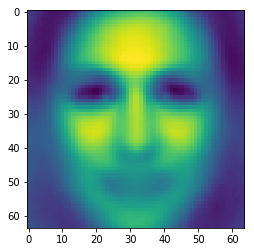

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt


## TODO: Plot the average face (creepy face)
plt.imshow(for_plot)

In [38]:
df['names']=faces_df['actor']
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,names
0,0.773481,0.596685,0.486188,0.464088,0.475138,0.508287,0.441989,0.414365,0.375691,0.309392,...,0.375691,0.243094,0.248619,0.243094,0.232044,0.226519,0.215470,0.281768,0.265193,Aaron Eckhart
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aaron Eckhart
2,0.036000,0.032000,0.048000,0.044000,0.028000,0.124000,0.052000,0.112000,0.064000,0.108000,...,0.404000,0.452000,0.372000,0.408000,0.388000,0.272000,0.308000,0.284000,0.300000,Aaron Eckhart
3,0.343348,0.244635,0.103004,0.120172,0.158798,0.231760,0.201717,0.188841,0.150215,0.188841,...,0.463519,0.587983,0.678112,0.751073,0.995708,0.068670,0.090129,0.120172,0.107296,Aaron Eckhart
4,0.221739,0.173913,0.130435,0.139130,0.178261,0.182609,0.247826,0.308696,0.334783,0.365217,...,0.221739,0.217391,0.208696,0.191304,0.165217,0.143478,0.134783,0.139130,0.147826,Aaron Eckhart
5,0.631579,0.680162,0.724696,0.291498,0.396761,0.194332,0.380567,0.396761,0.388664,0.283401,...,0.052632,0.048583,0.056680,0.044534,0.040486,0.052632,0.044534,0.040486,0.064777,Aaron Eckhart
6,0.434426,0.340164,0.303279,0.766393,0.237705,0.340164,0.286885,0.245902,0.331967,0.278689,...,0.545082,0.459016,0.319672,0.336066,0.348361,0.352459,0.364754,0.418033,0.434426,Aaron Eckhart
7,0.027027,0.049550,0.022523,0.108108,0.108108,0.067568,0.189189,0.234234,0.202703,0.274775,...,0.319820,0.211712,0.337838,0.500000,0.527027,0.490991,0.472973,0.445946,0.396396,Aaron Eckhart
8,0.000000,0.004673,0.018692,0.000000,0.014019,0.000000,0.032710,0.051402,0.032710,0.018692,...,0.411215,0.794393,0.995327,0.995327,0.962617,0.990654,0.981308,0.985981,0.943925,Aaron Eckhart
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aaron Eckhart


# 2 

In [84]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [58]:
## TODO: drop the rows with missing values
df.dropna(how="any",inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,names
0,0.773481,0.596685,0.486188,0.464088,0.475138,0.508287,0.441989,0.414365,0.375691,0.309392,...,0.375691,0.243094,0.248619,0.243094,0.232044,0.226519,0.215470,0.281768,0.265193,Aaron Eckhart
2,0.036000,0.032000,0.048000,0.044000,0.028000,0.124000,0.052000,0.112000,0.064000,0.108000,...,0.404000,0.452000,0.372000,0.408000,0.388000,0.272000,0.308000,0.284000,0.300000,Aaron Eckhart
3,0.343348,0.244635,0.103004,0.120172,0.158798,0.231760,0.201717,0.188841,0.150215,0.188841,...,0.463519,0.587983,0.678112,0.751073,0.995708,0.068670,0.090129,0.120172,0.107296,Aaron Eckhart
4,0.221739,0.173913,0.130435,0.139130,0.178261,0.182609,0.247826,0.308696,0.334783,0.365217,...,0.221739,0.217391,0.208696,0.191304,0.165217,0.143478,0.134783,0.139130,0.147826,Aaron Eckhart
5,0.631579,0.680162,0.724696,0.291498,0.396761,0.194332,0.380567,0.396761,0.388664,0.283401,...,0.052632,0.048583,0.056680,0.044534,0.040486,0.052632,0.044534,0.040486,0.064777,Aaron Eckhart
6,0.434426,0.340164,0.303279,0.766393,0.237705,0.340164,0.286885,0.245902,0.331967,0.278689,...,0.545082,0.459016,0.319672,0.336066,0.348361,0.352459,0.364754,0.418033,0.434426,Aaron Eckhart
7,0.027027,0.049550,0.022523,0.108108,0.108108,0.067568,0.189189,0.234234,0.202703,0.274775,...,0.319820,0.211712,0.337838,0.500000,0.527027,0.490991,0.472973,0.445946,0.396396,Aaron Eckhart
8,0.000000,0.004673,0.018692,0.000000,0.014019,0.000000,0.032710,0.051402,0.032710,0.018692,...,0.411215,0.794393,0.995327,0.995327,0.962617,0.990654,0.981308,0.985981,0.943925,Aaron Eckhart
10,0.344398,0.311203,0.340249,0.489627,0.323651,0.319502,0.236515,0.302905,0.228216,0.232365,...,0.394191,0.539419,0.481328,0.369295,0.294606,0.132780,0.107884,0.082988,0.107884,Aaron Eckhart
12,0.336323,0.053812,0.192825,0.107623,0.152466,0.080717,0.071749,0.152466,0.291480,0.327354,...,0.614350,0.600897,0.600897,0.757848,0.977578,1.000000,0.995516,0.937220,0.372197,Aaron Eckhart


In [65]:
## TODO: create the inputs and encode the target
df["target"] = LabelEncoder().fit_transform(df.names)
X_rf = df.loc[:,np.arange(0,4096,1)]
y_rf = df["target"]
## TODO: Create different values of max_features
Ms = np.arange(1,4097,105)
acc = []

In [66]:
#For 100 n_estimators 
for m in Ms:
    ## TODO: Compute the accuracy for different values of max_features
    rf_clf = RandomForestClassifier(n_estimators=100,max_features=m,
                                    oob_score=True,n_jobs=-1)
    acc.append(rf_clf.fit(X_rf,y_rf).oob_score_)
acc


##For 1000 n_estimators 
# for m in Ms:
#     ## TODO: Compute the accuracy for different values of max_features
#     rf_clf = RandomForestClassifier(n_estimators=1000,max_features=m,
#                                     oob_score=True,n_jobs=-1)
#     acc.append(rf_clf.fit(X_rf,y_rf).oob_score_)
# acc

[0.50323043790380473,
 0.57860732232591527,
 0.58937544867193103,
 0.60947595118449394,
 0.61091170136396267,
 0.60875807609475951,
 0.60516870064608763,
 0.5757358219669777,
 0.60301507537688437,
 0.58937544867193103,
 0.59798994974874375,
 0.63029432878679115,
 0.60157932519741564,
 0.60875807609475951,
 0.60229720028715006,
 0.59870782483847806,
 0.59870782483847806,
 0.59655419956927491,
 0.60875807609475951,
 0.59224694903086861,
 0.61019382627422825,
 0.60947595118449394,
 0.59440057430007176,
 0.60229720028715006,
 0.58004307250538412,
 0.61306532663316582,
 0.59224694903086861,
 0.59224694903086861,
 0.5958363244795406,
 0.61162957645369709,
 0.59727207465900933,
 0.61306532663316582,
 0.60660445082555636,
 0.60445082555635321,
 0.60660445082555636,
 0.59224694903086861,
 0.58291457286432158,
 0.60373295046661879,
 0.5879396984924623,
 0.6123474515434314]

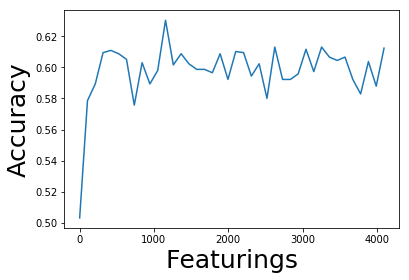

In [68]:
## TODO: Plot the accuracy as a function of max_features
plt.figure()
plt.plot(Ms,acc)
plt.xlabel("Featurings", fontsize=25)
plt.ylabel("Accuracy", fontsize=25)
#ax.legend(loc="upper right",fontsize=10)

In [69]:
## TODO: Create different values of n_components
Ns = np.arange(1,501,99)
p_1_cv_score = []
p_2_cv_score = []

for n in Ns:
    ## TODO: Set a pipeline of PCA and Random forest and another of StandardScaler, PCA and Random forest
    pca = PCA(n_components=n, whiten=True)
    rf_clf=RandomForestClassifier(n_estimators=1000, n_jobs=-1)
    ss=StandardScaler()
    
    p_1=Pipeline([('pca', pca), ('rf', rf_clf)])  # pca and rf
    p_2=Pipeline([('ss', ss), ('pca', pca), ('rf', rf_clf)])  # pca, rf, ss
        
    ## TODO: Compute the 10 fold-CV accuracy with stratified sampling for different values of n_components 
    p_1_cv_score.append(cross_val_score(p_1, X_rf,
                                   y_rf, scoring="accuracy",
                                   cv=StratifiedKFold(10, shuffle=True, random_state=42), n_jobs=-1).mean())
    p_2_cv_score.append(cross_val_score(p_2, X_rf,
                                   y_rf, scoring="accuracy",
                                   cv=StratifiedKFold(10, shuffle=True, random_state=42), n_jobs=-1).mean())

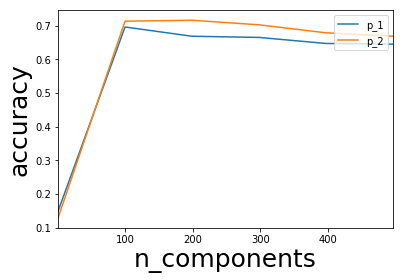

In [70]:
ax = pd.DataFrame({"p_1":p_1_cv_score,"p_2":p_2_cv_score},index=Ns).plot()
ax.set_xlabel("n_components", fontsize=25)
ax.set_ylabel("accuracy", fontsize=25)
ax.legend(loc="upper right",fontsize=10)

In [71]:
from sklearn.metrics import accuracy_score
## TODO: We are going to use StratifiedKFold to split the data into 10 folds
skf = StratifiedKFold(n_splits=10, random_state=42)
## TODO: Apply the get_n_splits function onto the inputs and the target. 
skf.get_n_splits(X_rf, y_rf)
result = []
## TODO: Use the split function to iterate thought the folds.
for train_index, test_index in skf.split(X_rf, y_rf):
    ## TODO: split the data into train and test sets
    # Piazza
    X_train,X_test = X_rf.iloc[train_index],X.iloc[test_index]
    y_train,y_test = y_rf.iloc[train_index],y.iloc[test_index]
    
    ## TODO: create a pipeline of StandardScaler and PCA with n_components=500, whiten=True
    ss = StandardScaler() 
    pca = PCA(n_components=500, whiten=True)    
    pipe = Pipeline([('ss', ss), ('pca', pca)])
    
    ## TODO: fit this pipeline with the train set and transform the train and test sets. 
    X_train_pipe = pipe.fit_transform(X_train, y_train)
    X_test_pipe = pipe.transform(X_test)  
    
    ## TODO: Perform a first Random Forest fit 
    rf_clf1 = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
    rf_clf1.fit(X_train_pipe, y_train)
    
    ## TODO: capture the feature importance using the Random Forest's feature_importances_ attribute
    feat_imp = pd.Series(rf_clf1.feature_importances_).sort_values(ascending=False).index.values 
    
    ## TODO: Perform a second Random Forest fit with the best features from feature_importances_ 
    rf_clf2 = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
    rf_clf2.fit(X_train_pipe[:,feat_imp[0:100]],y_train)
    ## TODO: measure the accuracy on the test set
    y_pred = rf_clf2.predict(X_test_pipe[:,feat_imp[0:100]])
    result.append(accuracy_score(y_test,y_pred))
## TODO: Average the results for the all the folds and compare the performance with the previous section
np.mean(result)

0.72801917683508799

# 3

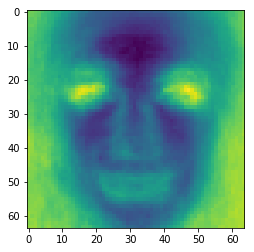

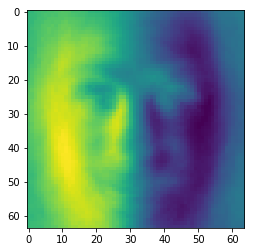

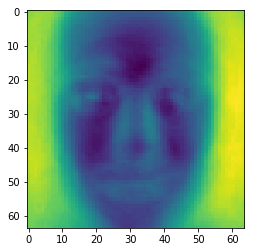

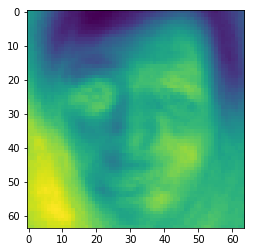

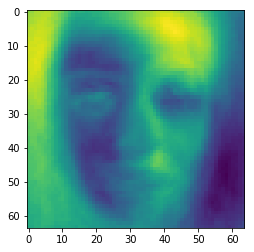

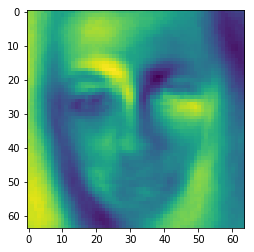

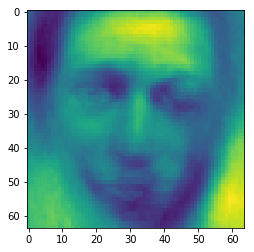

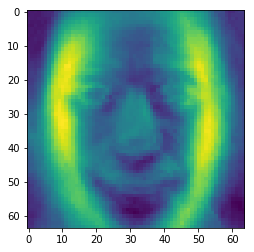

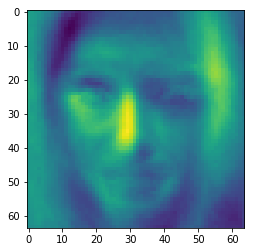

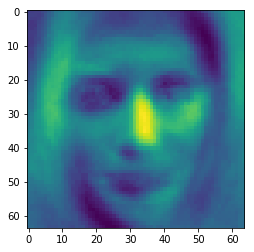

In [75]:
## TODO: Plot the 10 first eigen faces

ss = StandardScaler()
X_scale = ss.fit_transform(X_rf,y_rf)
pca = PCA(n_components=50, whiten=True)
eigen_faces = pca.fit(X_scale,y_rf).components_[0:10]

for e in eigen_faces:
    imshow(np.reshape(a=e,newshape=(64,64)))
    plt.show()

Original Image: 



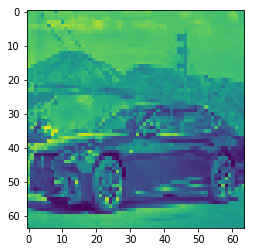

Reconstructed Image: 



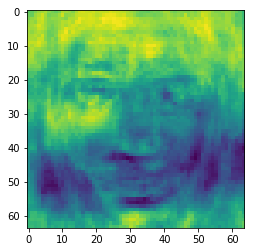

Original Image: 



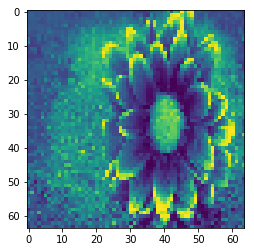

Reconstructed Image: 



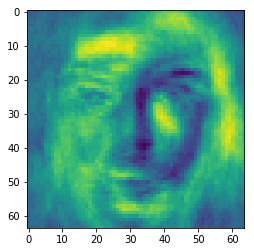

Original Image: 



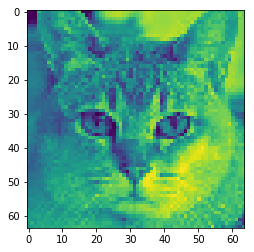

Reconstructed Image: 



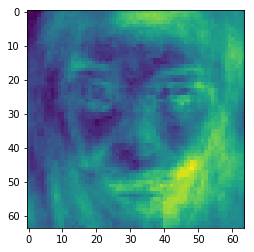

Original Image: 



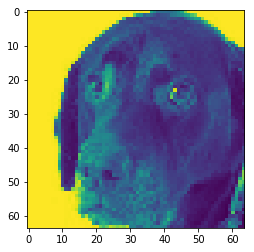

Reconstructed Image: 



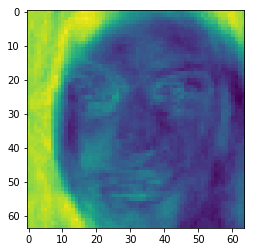

Original Image: 



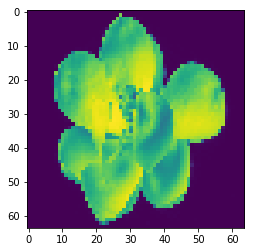

Reconstructed Image: 



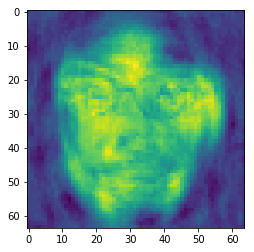

Original Image: 



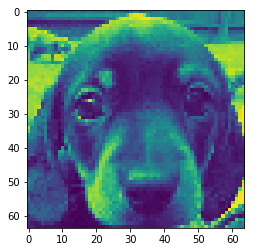

Reconstructed Image: 



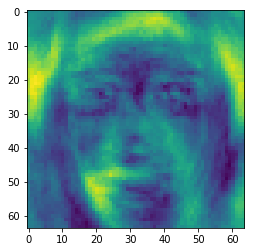

Original Image: 



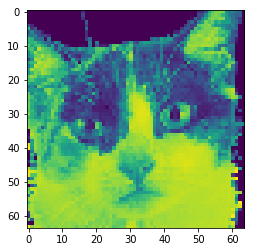

Reconstructed Image: 



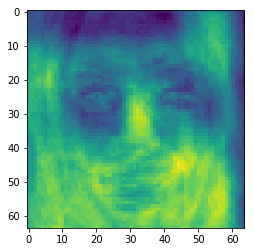

Original Image: 



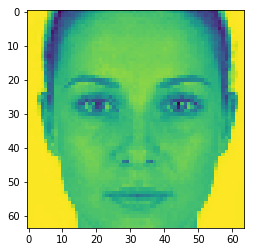

Reconstructed Image: 



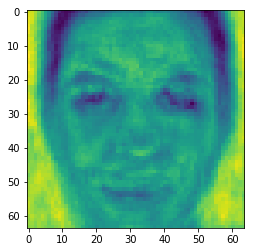

Original Image: 



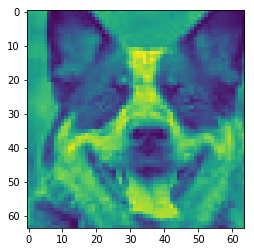

Reconstructed Image: 



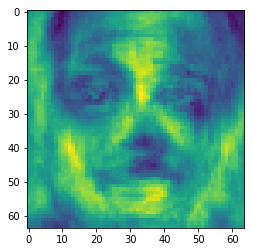

Original Image: 



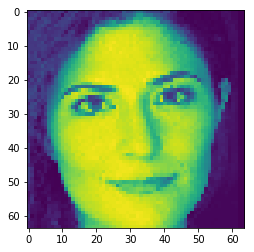

Reconstructed Image: 



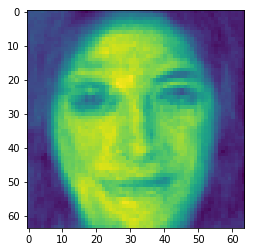

Original Image: 



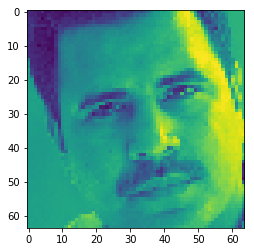

Reconstructed Image: 



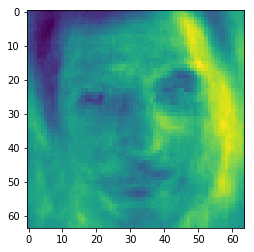

Original Image: 



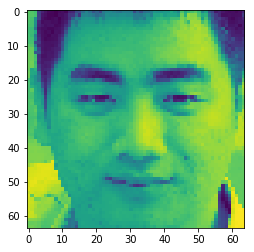

Reconstructed Image: 



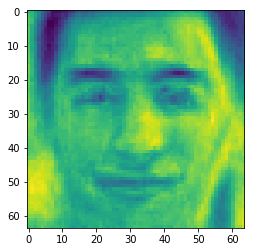

Original Image: 



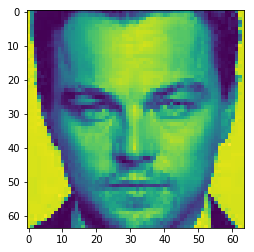

Reconstructed Image: 



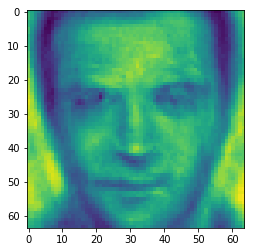

Original Image: 



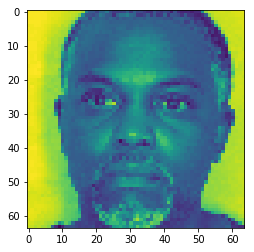

Reconstructed Image: 



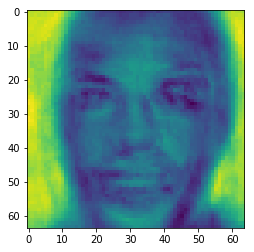

Original Image: 



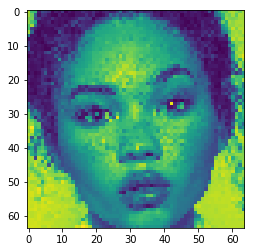

Reconstructed Image: 



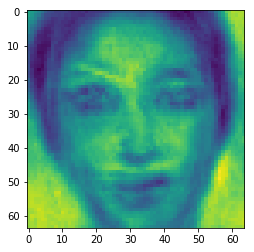

Original Image: 



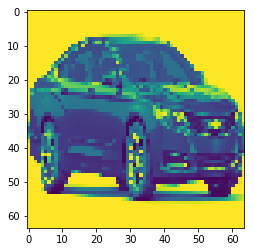

Reconstructed Image: 



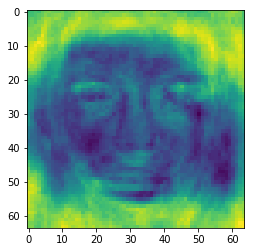

Original Image: 



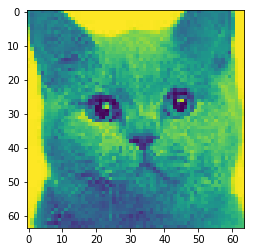

Reconstructed Image: 



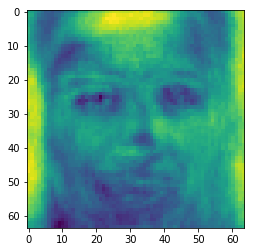

Original Image: 



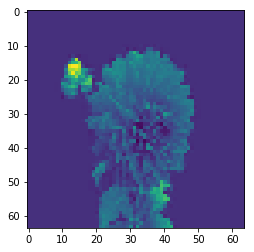

Reconstructed Image: 



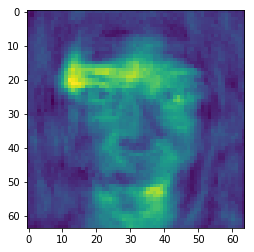

Original Image: 



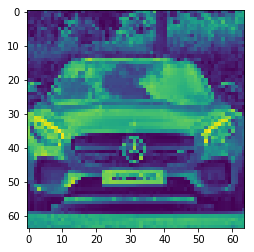

Reconstructed Image: 



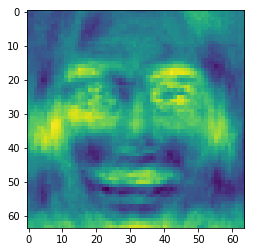

In [90]:
import os
from sklearn import metrics
from sklearn import preprocessing

folder = "./additional_images/test_face_recognition/"

all_files = os.listdir(folder)

## TODO: choose n_components
ss = StandardScaler()
X_scale = ss.fit_transform(X_rf,y_rf)
pca = PCA(n_components=100, whiten=True)
pca.fit(X_scale,y_rf)


## TODO: for every image project and reconstruct the image
## TODO: Plot each image and it reconstructed version
for f in all_files:
    image = cv2.imread(folder+f,0)
    image = cv2.resize(image,(64,64))
    image_norm_og = normalize(image).flatten().reshape(1,-1)
    
    proj_image = pca.transform(image_norm_og)
    construct_image = pca.inverse_transform(proj_image)
    
## TODO: Plot each image and it reconstructed version
    print("Original Image: \n")
    imshow(np.reshape(a=image_norm_og,newshape=(64,64)))
    plt.show()
    print("Reconstructed Image: \n")
    imshow(np.reshape(a=construct_image,newshape=(64,64)))
    plt.show()

In [ ]:
#fin

# 4

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture

In [113]:
## TODO: cluster the data into 2 clusters and compare them with the gender target

df["target"] = LabelEncoder().fit_transform(df.names)
Xn = df.loc[:,np.arange(0,4096,1)]
Yohe = df["target"]

##need new column to pass gender
# def create_gender(num):
#     if num <= 4:
#         gender = 1
#     else:
#         gender = 0
#     return(gender)

# facegender_df["Gender"] = df.apply(create_gender)
# facegender_df
 

NameError: name 'gender' is not defined

In [ ]:
## TODO: train a pipeline to learn gender
#Using AgCluster
pca = PCA(n_components=100, whiten=True)
X_PCA = pca.fit_transform(X_rf,y_rf)
y_gender = faces_df["Gender"]

alg_cluster = AgglomerativeClustering(affinity="cosine",linkage="average")

alg_cluster_preds = alg_cluster.fit_predict(X_PCA)

pd.Series({"Agg_Cluster":accuracy_score(y_true=y_gender,y_pred=alg_cluster_preds)})

In [ ]:
import cv2
# We first load the trained AdaBoost model from opencv to recognize face
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# We load one of our images
img = cv2.imread('./additional_images/test_gender_recognition/image1.jpg')
# We convert it to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# We detect the faces on the image
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# For each image we plot a rectangle around the face
for x, y, w, h in faces:
    # We plot the rectange
    cv2.rectangle(img,(x, y),(x + w, y + h),(255,0,0),2)
    # We write some text
    cv2.putText(img, "Picture", (x,y), cv2.FONT_HERSHEY_SIMPLEX,  1, (0, 255, 0), 2, cv2.LINE_AA)

# We plot the resulting image
# Opencv reads images as BGR but matplotlib RGB images so we need to convert
plt.figure(figsize=(15,10))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [ ]:
###Analysis 
We could make this learning better by increasing the data the machines learns from ei trail and error.
